# Mapeando el Universo



## Introducción al aprendizaje automático

  * Tomar el dataset "limpio" obtenido del práctico anterior y considerar algunos de los siguientes conjuntos de variables
  
   + modelMag_*, colores_modelMag, devRad_*
   + modelMag_*, colores_modelMag, expRad_*
   + petroMag_*, colores_petroMag, petroRad_*, petroR50_*, petroR90_*
  
  * Emplear el modelo de regresión lineal para estimar la variables _redshift_.
   + Considere utilizar o no regulación
    
  * Utilizar algún método para evaluar la complejidad del/de los modelo/s.
  
  * Evaluar que sucede si se distrimina por tipo de galaxia.
  
  * Emplear algunos (más de uno) de los modelos de clasificación (perceptrón, regresión logística, vecinos más cercanos) para clasificar las galaxias en elípticas y espirales a partir de las variables elegidas.
  
   + Computar las metricas accuracy,precision, recall, F1, matriz de confusión
 
   + Visualización de la frontera de decisión
   

### Lectura de datos

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile
import os.path

if not os.path.isfile('../data/DiploDatos_clean.csv'):
    path_to_zip_file = '../data/DiploDatos_clean.zip'
    directory_to_extract_to = '../data/'
    
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

filename = '../data/DiploDatos_clean.csv'
df = pd.read_csv(filename,index_col=0)
df

,z,subClass_AGN,subClass_AGN BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST BROADLINE,subClass_STARFORMING,subClass_STARFORMING BROADLINE,subClass_UNKNOWN,velDisp,...,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0,0,0,1,0,0,0,0,60.39996,...,0.25431,0.09500,0.11706,0.79000,0.35837,0.15143,0.10247,0.0,0.0,1.0
957066087332079616,0.141718,0,0,0,0,0,0,0,1,217.80020,...,1.07714,0.45090,0.35530,2.11901,1.03352,0.43049,0.27852,0.0,0.0,1.0
957065537576265728,0.140137,0,0,0,0,0,0,0,1,138.90830,...,0.85273,0.41891,0.31316,1.07275,0.76730,0.36148,0.22301,1.0,0.0,0.0
957066911965800448,0.066672,0,0,0,0,0,0,0,1,241.28300,...,0.92406,0.42804,0.32709,1.90482,0.94006,0.41266,0.26840,0.0,1.0,0.0
693629150375733248,0.229718,0,0,0,0,0,0,0,1,198.84190,...,1.35756,0.48971,0.40055,2.99483,1.33661,0.49060,0.37582,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,0,0,0,0,0,0,0,1,181.48450,...,1.03221,0.44277,0.30476,1.22845,0.93079,0.40980,0.05350,0.0,0.0,1.0
957077357326264320,0.084226,0,0,0,0,0,1,0,0,43.81417,...,0.67597,0.38023,0.24776,1.51657,0.61436,0.38013,0.17309,1.0,0.0,0.0
957066637087893504,0.141610,0,0,0,0,0,0,0,1,194.91520,...,1.09985,0.45063,0.33057,2.28958,0.96166,0.41758,0.25075,1.0,0.0,0.0


  * Tomar el dataset "limpio" obtenido del práctico anterior y considerar algunos de los siguientes conjuntos de variables
  
   + modelMag_*, colores_modelMag, devRad_*
   + modelMag_*, colores_modelMag, expRad_*
   + petroMag_*, colores_petroMag, petroRad_*, petroR50_*, petroR90_*

In [4]:
modelMag_deVRad = [col for col in df if col.startswith('model')]
modelMag_deVRad = modelMag_deVRad + [col for col in df if col.startswith('deVRad_')]
modelMag_deVRad

['modelMag_u',
 'modelMag_g',
 'modelMag_r',
 'modelMag_i',
 'modelMag_z',
 'modelColor_ug',
 'modelColor_gr',
 'modelColor_ri',
 'modelColor_iz',
 'deVRad_u',
 'deVRad_g',
 'deVRad_r',
 'deVRad_i',
 'deVRad_z']

In [5]:
modelMag_expRad = [col for col in df if col.startswith('model')]
modelMag_expRad = modelMag_expRad + [col for col in df if col.startswith('expRad_')]
modelMag_expRad

['modelMag_u',
 'modelMag_g',
 'modelMag_r',
 'modelMag_i',
 'modelMag_z',
 'modelColor_ug',
 'modelColor_gr',
 'modelColor_ri',
 'modelColor_iz',
 'expRad_u',
 'expRad_g',
 'expRad_r',
 'expRad_i',
 'expRad_z']

In [6]:
petro = [col for col in df if col.startswith('petro')]
petro

['petroMag_u',
 'petroMag_g',
 'petroMag_r',
 'petroMag_i',
 'petroMag_z',
 'petroRad_u',
 'petroRad_g',
 'petroRad_r',
 'petroRad_i',
 'petroRad_z',
 'petroR50_u',
 'petroR50_g',
 'petroR50_r',
 'petroR50_i',
 'petroR50_z',
 'petroR90_u',
 'petroR90_g',
 'petroR90_r',
 'petroR90_i',
 'petroR90_z',
 'petroColor_ug',
 'petroColor_gr',
 'petroColor_ri',
 'petroColor_iz']

  * Emplear el modelo de regresión lineal para estimar la variables _redshift_.
   + Considere utilizar o no regulación   

Se utiliza el modelo de Linear Regression ya que es el más simple de entrenar y aplicar y no se mostraba una mejora notable con los modelos lineales más complejos. El mejor resultado se obtuvo con modelMag_deVRad

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

groups= [modelMag_deVRad, modelMag_expRad, petro]
y = df[['z']]

def model_train_test(model, X, y): 
    
    print(model , '\n')
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

    ss= StandardScaler()
    ss.fit(X)
    X_train= ss.transform(X_train)
    X_test= ss.transform(X_test)

    # Entrenar
    model.fit(X_train, y_train)
    
    return model, X_train, y_train, X_test, y_test


def model_evaluation_mean_squarred(model, X_train, y_train, X_test, y_test):
    # Predecir
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluar
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    print('Train error: ', train_error)
    print('Test error: ', test_error)
    print('Score: ', model.score(X_test,y_test))
    print('------------------------------------')

for group in groups:
    X = df[group]
    model, X_train, y_train, X_test, y_test= model_train_test(LinearRegression(n_jobs=-1), X, y)
    model_evaluation_mean_squarred(model, X_train, y_train, X_test, y_test)
   

LinearRegression(n_jobs=-1) 

Train error:  0.0006047025760608245
Test error:  0.0006087297919247709
Score:  0.734630500659315
------------------------------------
LinearRegression(n_jobs=-1) 

Train error:  0.0006112936699606869
Test error:  0.0006139577718918767
Score:  0.7323514164994166
------------------------------------
LinearRegression(n_jobs=-1) 

Train error:  0.0006945536499490006
Test error:  0.0007024031309646347
Score:  0.6937945708061382
------------------------------------


1. Utilizar algún método para evaluar la complejidad del/de los modelo/s.

Viendo los resultados del punto anterior podemos ver que no hay algun beneficio de usar un mayor nro de features como en el grupo 3, ya que la el error fue mayor en ese caso que en los otros.

Empleamos un test de validacion cruzada para evaluar el entrenamiento con distintos subsets del dataset. Y obtenemos resultados similares en todas las divisiones, por ende consideramos que la división del dataset no afecta al entrenamiento del modelo

In [8]:
from sklearn.model_selection import cross_val_score

display(cross_val_score(Ridge(), df[modelMag_deVRad], y, cv =10))
display(cross_val_score(LinearRegression(), df[modelMag_deVRad], y, cv= 10))

array([0.72453686, 0.74677631, 0.73555645, 0.74944331, 0.73948237,
       0.7454686 , 0.73112854, 0.73691038, 0.72300875, 0.73311024])

array([0.72453348, 0.746777  , 0.7355545 , 0.74945097, 0.73949714,
       0.74548519, 0.73112417, 0.73690203, 0.7230019 , 0.73310319])

  * Evaluar que sucede si se distrimina por tipo de galaxia.

Si se redujo el error en todos los casos, salvo en uncertain que es entendible ya que no hay un patrón definido para predecir. Destacamos el caso de elliptical con el grupo 2, obtuvimos un 92% de precisión, que es notablemente mejor a los resultados anteriores


In [8]:
for shape in ['spiral', 'elliptical', 'uncertain']:
    print('____________________________________')
    print('\n' + shape + ': ')
    for group in groups:
        X = df[df[shape] == 1][group]
        y = df[df[shape] == 1][['z']]
        
        model, X_train, y_train, X_test, y_test= model_train_test(LinearRegression(n_jobs= -1), X, y)
        model_evaluation_mean_squarred(model, X_train, y_train, X_test, y_test)

____________________________________

spiral: 
LinearRegression(n_jobs=-1) 

Train error:  0.0004978328237959866
Test error:  0.0004882044214076874
Score:  0.6630089736213434
------------------------------------
LinearRegression(n_jobs=-1) 

Train error:  0.0005083891601798556
Test error:  0.0004975969877067403
Score:  0.6565256022739048
------------------------------------
LinearRegression(n_jobs=-1) 

Train error:  0.0005321374810176978
Test error:  0.0005246109088040574
Score:  0.6378788047482944
------------------------------------
____________________________________

elliptical: 
LinearRegression(n_jobs=-1) 

Train error:  0.00032474705922585964
Test error:  0.00028617029267729877
Score:  0.9222854923821897
------------------------------------
LinearRegression(n_jobs=-1) 

Train error:  0.00033032339704202875
Test error:  0.0002905551125744123
Score:  0.9210947184688358
------------------------------------
LinearRegression(n_jobs=-1) 

Train error:  0.0003548363153013232
Test err


  * Emplear algunos (más de uno) de los modelos de clasificación (perceptrón, regresión logística, vecinos más cercanos) para clasificar las galaxias en elípticas y espirales a partir de las variables elegidas.
  
   + Computar las metricas accuracy,precision, recall, F1, matriz de confusión
 
   + Visualización de la frontera de decisión

Tomamos el df original y dejamos las filas que tienen forma "uncertain" de lado. Luego tomamos solo una de las columnas de forma y eliminamos la otra. En este caso nos quedamos con 'spiral' y la renombramos a 'shape'. 1 significa que tiene forma spiral, mientras que 0 significa que tiene forma eliptica.


In [10]:
df_train = df[(df.elliptical == 1) | (df.spiral == 1)]
df_train = df_train.drop(['elliptical', 'uncertain'], axis=1)
df_train = df_train.rename(columns={'spiral':'shape'})
df_train

,z,subClass_AGN,subClass_AGN BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST BROADLINE,subClass_STARFORMING,subClass_STARFORMING BROADLINE,subClass_UNKNOWN,velDisp,...,extinction_z,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz,shape
specObjID,,,,,,,,,,,,,,,,,,,,,
957065537576265728,0.140137,0,0,0,0,0,0,0,1,138.90830,...,0.038191,1.36642,0.85273,0.41891,0.31316,1.07275,0.76730,0.36148,0.22301,1.0
957066911965800448,0.066672,0,0,0,0,0,0,0,1,241.28300,...,0.039920,1.98755,0.92406,0.42804,0.32709,1.90482,0.94006,0.41266,0.26840,0.0
637262958233151488,0.098105,0,0,0,0,0,0,0,1,135.15380,...,0.065738,2.00215,0.99819,0.41886,0.34026,1.87594,1.00148,0.41436,0.36765,1.0
637266806523848704,0.098102,0,0,0,0,0,0,0,1,112.93020,...,0.091773,2.23307,1.08105,0.58453,0.47377,1.55629,0.93613,0.56206,0.31988,1.0
657536025333098496,0.140486,0,0,0,0,0,0,0,1,175.91280,...,0.035493,1.88164,1.11437,0.44518,0.35569,1.99036,1.08765,0.42870,0.33457,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676731578688235520,0.042114,0,0,0,0,0,1,0,0,66.03696,...,0.024811,1.55416,0.64171,0.30376,0.23973,1.46784,0.57502,0.22963,0.12693,1.0
676730754054514688,0.041741,0,0,0,0,0,1,0,0,84.41058,...,0.023377,1.25228,0.53823,0.31723,0.26024,1.21323,0.47440,0.31167,0.23409,1.0
676720858449864704,0.104332,0,0,0,0,0,1,0,0,44.97516,...,0.025451,1.24413,0.68379,0.35308,0.26958,1.16363,0.58216,0.30975,0.19878,1.0


El mejor resultado lo obtenemos con DecisionTreeClassifier con 100% en entrenamiento y Test accuracy: 93%, con el grupo 2. De esta forma entendemos que los valores de uncertain introducen mucho ruido a los modelos, y que con modelos no lineales obtenemos un mejor resultado y no se necesita mucho mayor tiempo de entrenamiento.

_____________________________________
Perceptron() 

Train accuracy:  0.8954517683796076
Test accuracy:  0.8969805582708809
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80     33799
         1.0       0.97      0.89      0.93    113511

    accuracy                           0.90    147310
   macro avg       0.84      0.90      0.87    147310
weighted avg       0.91      0.90      0.90    147310



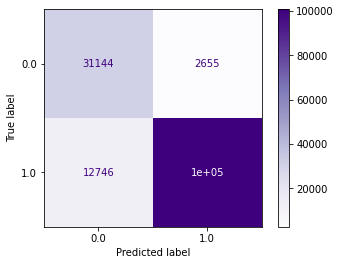

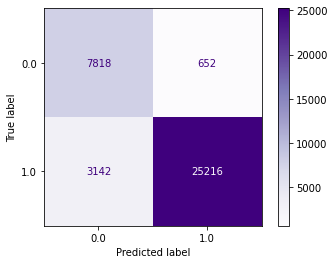

------------------------------------
Perceptron() 

Train accuracy:  0.9432557192315525
Test accuracy:  0.9446888237210818
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87     33799
         1.0       0.95      0.98      0.96    113511

    accuracy                           0.94    147310
   macro avg       0.93      0.90      0.92    147310
weighted avg       0.94      0.94      0.94    147310



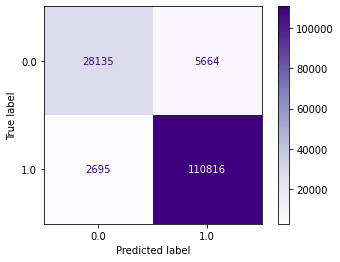

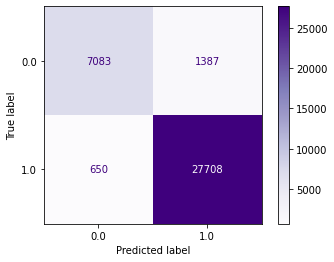

------------------------------------
Perceptron() 

Train accuracy:  0.9121987645102165
Test accuracy:  0.9108558705332899
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80     33799
         1.0       0.93      0.96      0.94    113511

    accuracy                           0.91    147310
   macro avg       0.89      0.86      0.87    147310
weighted avg       0.91      0.91      0.91    147310



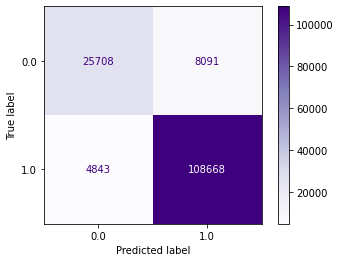

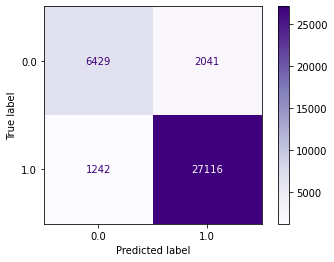

------------------------------------
_____________________________________
LogisticRegression() 

Train accuracy:  0.9386396035571244
Test accuracy:  0.9399098512001738
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     33799
         1.0       0.96      0.96      0.96    113511

    accuracy                           0.94    147310
   macro avg       0.91      0.91      0.91    147310
weighted avg       0.94      0.94      0.94    147310



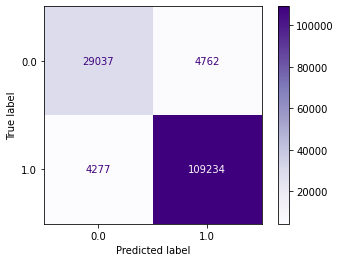

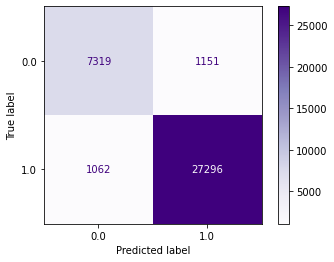

------------------------------------
LogisticRegression() 

Train accuracy:  0.9470843798791664
Test accuracy:  0.9473769957640925
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     33799
         1.0       0.96      0.97      0.97    113511

    accuracy                           0.95    147310
   macro avg       0.93      0.92      0.92    147310
weighted avg       0.95      0.95      0.95    147310



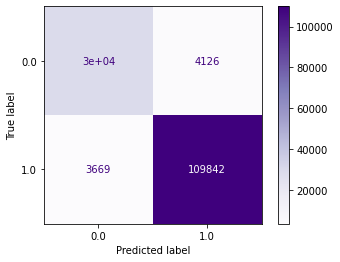

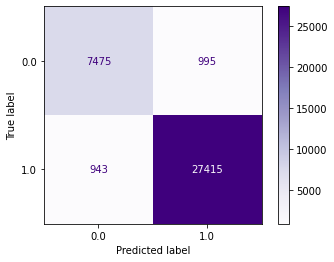

------------------------------------
LogisticRegression() 

Train accuracy:  0.9347634240716856
Test accuracy:  0.9367872271098078
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86     33799
         1.0       0.95      0.96      0.96    113511

    accuracy                           0.93    147310
   macro avg       0.91      0.90      0.91    147310
weighted avg       0.93      0.93      0.93    147310



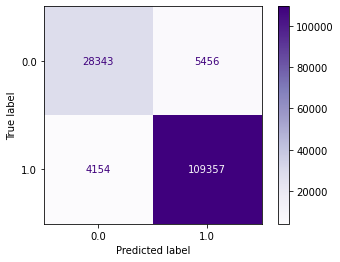

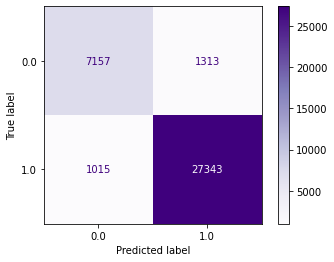

------------------------------------
_____________________________________
LinearSVC() 

Train accuracy:  0.9381168963410494
Test accuracy:  0.9392038666232214
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     33799
         1.0       0.96      0.96      0.96    113511

    accuracy                           0.94    147310
   macro avg       0.91      0.91      0.91    147310
weighted avg       0.94      0.94      0.94    147310



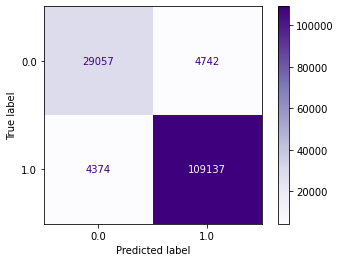

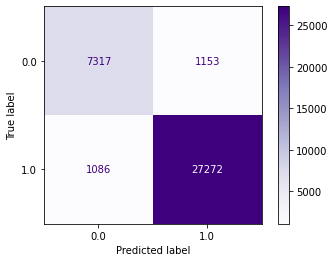

------------------------------------
LinearSVC() 

Train accuracy:  0.9469621885819021
Test accuracy:  0.9474584555229717
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     33799
         1.0       0.96      0.97      0.97    113511

    accuracy                           0.95    147310
   macro avg       0.93      0.92      0.92    147310
weighted avg       0.95      0.95      0.95    147310



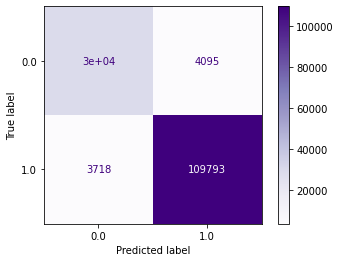

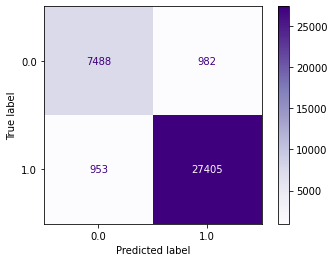

------------------------------------
LinearSVC() 

Train accuracy:  0.9345529835041748
Test accuracy:  0.9365156945802107
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85     33799
         1.0       0.95      0.96      0.96    113511

    accuracy                           0.93    147310
   macro avg       0.91      0.90      0.91    147310
weighted avg       0.93      0.93      0.93    147310



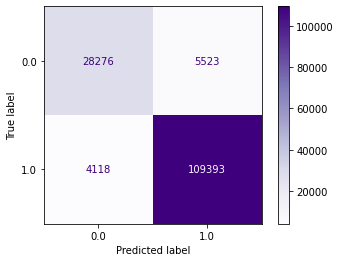

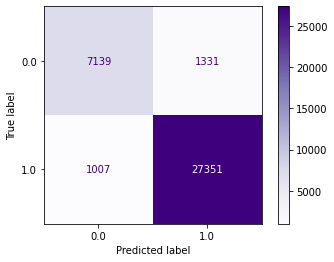

------------------------------------
_____________________________________
DecisionTreeClassifier() 

Train accuracy:  1.0
Test accuracy:  0.9258173129140871
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33799
         1.0       1.00      1.00      1.00    113511

    accuracy                           1.00    147310
   macro avg       1.00      1.00      1.00    147310
weighted avg       1.00      1.00      1.00    147310



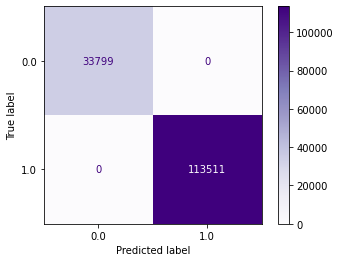

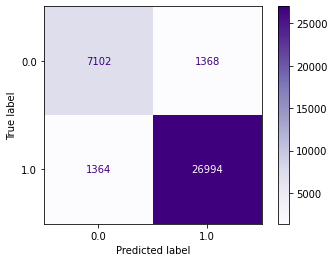

------------------------------------
DecisionTreeClassifier() 

Train accuracy:  1.0
Test accuracy:  0.9343162810904746
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33799
         1.0       1.00      1.00      1.00    113511

    accuracy                           1.00    147310
   macro avg       1.00      1.00      1.00    147310
weighted avg       1.00      1.00      1.00    147310



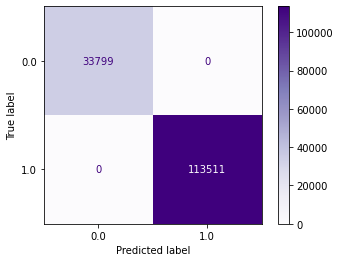

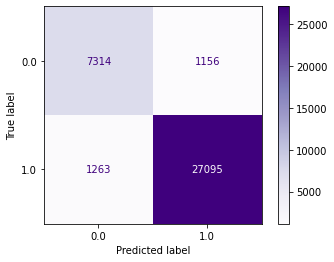

------------------------------------
DecisionTreeClassifier() 

Train accuracy:  1.0
Test accuracy:  0.9103128054740958
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33799
         1.0       1.00      1.00      1.00    113511

    accuracy                           1.00    147310
   macro avg       1.00      1.00      1.00    147310
weighted avg       1.00      1.00      1.00    147310



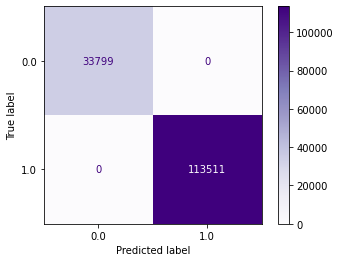

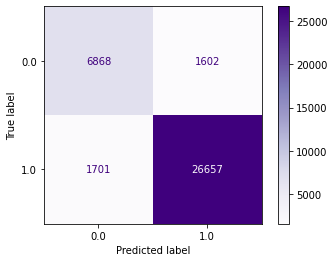

------------------------------------


In [11]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

from sklearn import metrics

def model_classification_evaluation(model, X_train, y_train, X_test, y_test):
    # Predecir
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluar
    train_error = accuracy_score(y_train, y_train_pred)
    test_error = accuracy_score(y_test, y_test_pred)
    print('Train accuracy: ', train_error)
    print('Test accuracy: ', test_error)
    print(metrics.classification_report(y_train, y_train_pred))
    plot_confusion_matrix(model, X_train, y_train,cmap='Purples')
    plot_confusion_matrix(model, X_test, y_test,cmap='Purples')
    plt.show()
    print('------------------------------------')

models= [Perceptron(tol=1e-3, random_state=0), LogisticRegression(), LinearSVC(), DecisionTreeClassifier()]
for clf_model in models:
    print("_____________________________________")
    for group in groups:

        X = df_train[group]
        y = df_train['shape']

        model, X_train, y_train, X_test, y_test= model_train_test(clf_model, X, y)
        model_classification_evaluation(model, X_train, y_train, X_test, y_test)